<a href="https://colab.research.google.com/github/jawaddi/ETL/blob/main/customer_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification of Customer Reviews**




#Importing Needed packages
## **Objectives**
* Developing Machine learning models to classify Customer reviews


In [1]:
import json
import pandas as pd


In [2]:

import numpy as np
import seaborn as sns
from matplotlib import rc
from pylab import rcParams
import matplotlib.pyplot as plt
from textwrap import wrap
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score,precision_score, recall_score

import re
import spacy
sp = spacy.load('en_core_web_sm')

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

import transformers
from transformers import BertModel, BertTokenizer, BertForSequenceClassification
from transformers import AdamW, get_linear_schedule_with_warmup

import torch
from torch import nn,optim
from torch.utils.data import Dataset,DataLoader,TensorDataset, RandomSampler, SequentialSampler
import torch.nn as nn
import torch.nn.functional as F
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

import time
import datetime

import tensorflow as tf

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid',palette='muted',font_scale=1.2)
color_palette=['#01BEFE','#FFDD00','#FF7D00','#FF006D','#ADFF02','#8F00FF']
sns.set_palette(sns.color_palette(color_palette))

rcParams['figure.figsize']= 10,5

seed=42
np.random.seed(seed)
torch.manual_seed(seed)

import sys
import os
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
!pip install transformers

In [4]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=53ac072d98e17704715fed367ae3ac79aa52c3fa8f7e71694e3c78c1ce56bfed
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


# yelp_academic_dataset_review

# upload Data

In [5]:
data_file_review = open("yelp_academic_dataset_review.json")

data_review = []
for line in data_file_review:
        data_review.append(json.loads(line))


In [6]:
review_df = pd.DataFrame(data_review)

In [7]:
# Assuming 'df' is your DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [8]:
review_df.head(10)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
5,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31
6,6AxgBCNX_PNTOxmbRSwcKQ,r3zeYsv1XFBRA4dJpL78cw,gmjsEdUsKpj9Xxu6pdjH0g,5.0,0,2,0,Loved this tour! I grabbed a groupon and the p...,2015-01-03 23:21:18
7,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5.0,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16
8,ZKvDG2sBvHVdF5oBNUOpAQ,wSTuiTk-sKNdcFyprzZAjg,B5XSoSG3SfvQGtKEGQ1tSQ,3.0,1,1,0,This easter instead of going to Lopez Lake we ...,2016-03-30 22:46:33
9,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3.0,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06


# Data Exploration
* Let's first have a descriptive exploration on our data.


In [9]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_id    20000 non-null  object 
 1   user_id      20000 non-null  object 
 2   business_id  20000 non-null  object 
 3   stars        20000 non-null  float64
 4   useful       20000 non-null  int64  
 5   funny        20000 non-null  int64  
 6   cool         20000 non-null  int64  
 7   text         20000 non-null  object 
 8   date         20000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ MB


In [10]:
review_df.describe()

,stars,useful,funny,cool
count,20000.000000,20000.000000,20000.000000,20000.00000
mean,3.852350,0.886300,0.253350,0.34220
std,1.349163,1.937436,0.945044,1.06111
min,1.000000,0.000000,0.000000,0.00000
25%,3.000000,0.000000,0.000000,0.00000
50%,4.000000,0.000000,0.000000,0.00000
75%,5.000000,1.000000,0.000000,0.00000
max,5.000000,91.000000,26.000000,44.00000


In [11]:
print(review_df.isnull().sum())


review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64


In [12]:
yelp_df = review_df[['stars','text']]

In [13]:
# 0-->negative
# 1-->positive
# remove the reviews with stars equal 3.0

# yelp_df['feedback'] = yelp_df['stars'].apply(lambda x: 1 if x > 3 else 0)
yelp_df['feedback'] = yelp_df['stars'].apply(lambda x: int(1) if x > 3 else int(0) if x < 3 else -1)
yelp_df= yelp_df[(yelp_df["stars"]!=3)]

<ipython-input-13-2176f947f8db>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp_df['feedback'] = yelp_df['stars'].apply(lambda x: int(1) if x > 3 else int(0) if x < 3 else -1)


In [14]:
yelp = yelp_df[(yelp_df["stars"]!=3)]

yelp_df.head(10)

,stars,text,feedback
1,5.0,I've taken a lot of spin classes over the year...,1
3,5.0,"Wow! Yummy, different, delicious. Our favo...",1
4,4.0,Cute interior and owner (?) gave us tour of up...,1
5,1.0,I am a long term frequent customer of this est...,0
6,5.0,Loved this tour! I grabbed a groupon and the p...,1
7,5.0,Amazingly amazing wings and homemade bleu chee...,1
10,5.0,My experience with Shalimar was nothing but wo...,1
11,4.0,"Locals recommended Milktooth, and it's an amaz...",1
12,4.0,Love going here for happy hour or dinner! Gre...,1
13,4.0,Good food--loved the gnocchi with marinara\nth...,1


In [15]:
yelp_df['feedback'].value_counts()

1    14031
0     3728
Name: feedback, dtype: int64

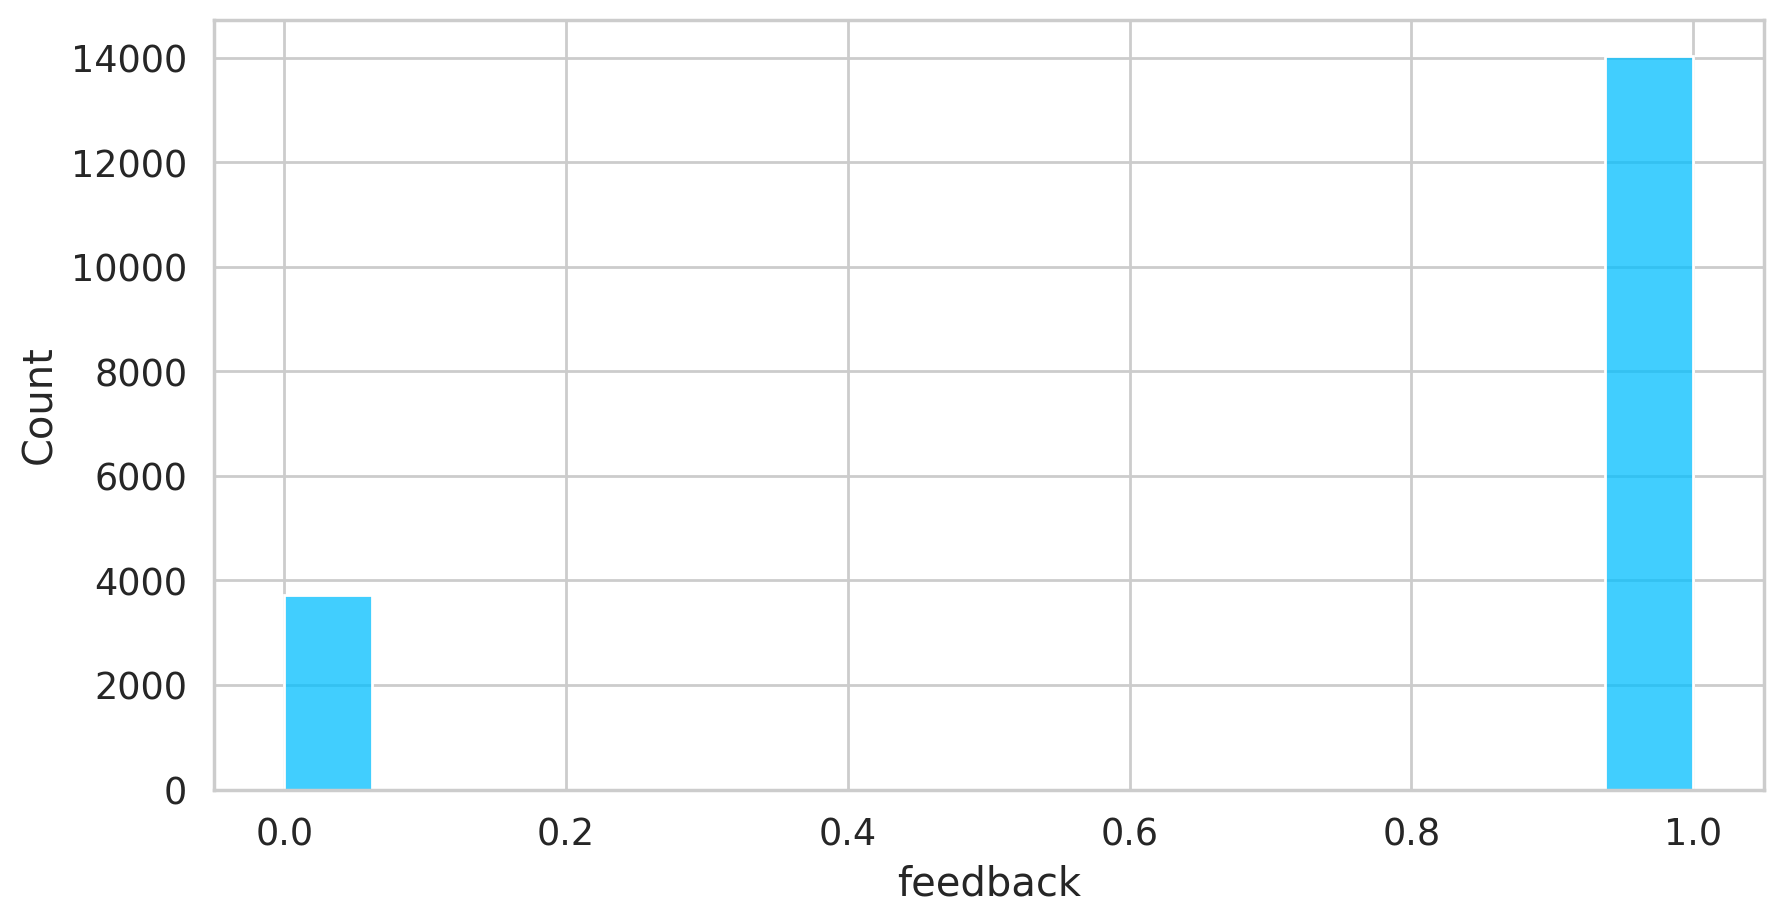

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram
sns.histplot(yelp_df['feedback'])
plt.show()

## Balancing the dataset

In [17]:
# separate the data
yelp_P_feedback = yelp_df[yelp_df['feedback']==1] #positive feedback
yelp_N_feedback = yelp_df[yelp_df['feedback']==0] #Negative feedback


In [18]:
#here we will depend on the how many negative feedback we have to balance our data
yelp_P_feedback = yelp_P_feedback.sample(yelp_N_feedback.shape[0])


In [19]:
# concatinate the positive and negative row
yelp_balanced_df = yelp_N_feedback.append(yelp_P_feedback, ignore_index=True)

<ipython-input-19-a5d7c81c8d9a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  yelp_balanced_df = yelp_N_feedback.append(yelp_P_feedback, ignore_index=True)


In [20]:
# shuffle the data
yelp_balanced_df = yelp_balanced_df.sample(frac=1).reset_index(drop=True)

In [21]:
yelp_balanced_df['feedback'].value_counts()

1    3728
0    3728
Name: feedback, dtype: int64

In [22]:
yelp=yelp_balanced_df

In [23]:
yelp['text length'] = yelp['text'].apply(len)

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

###We use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings

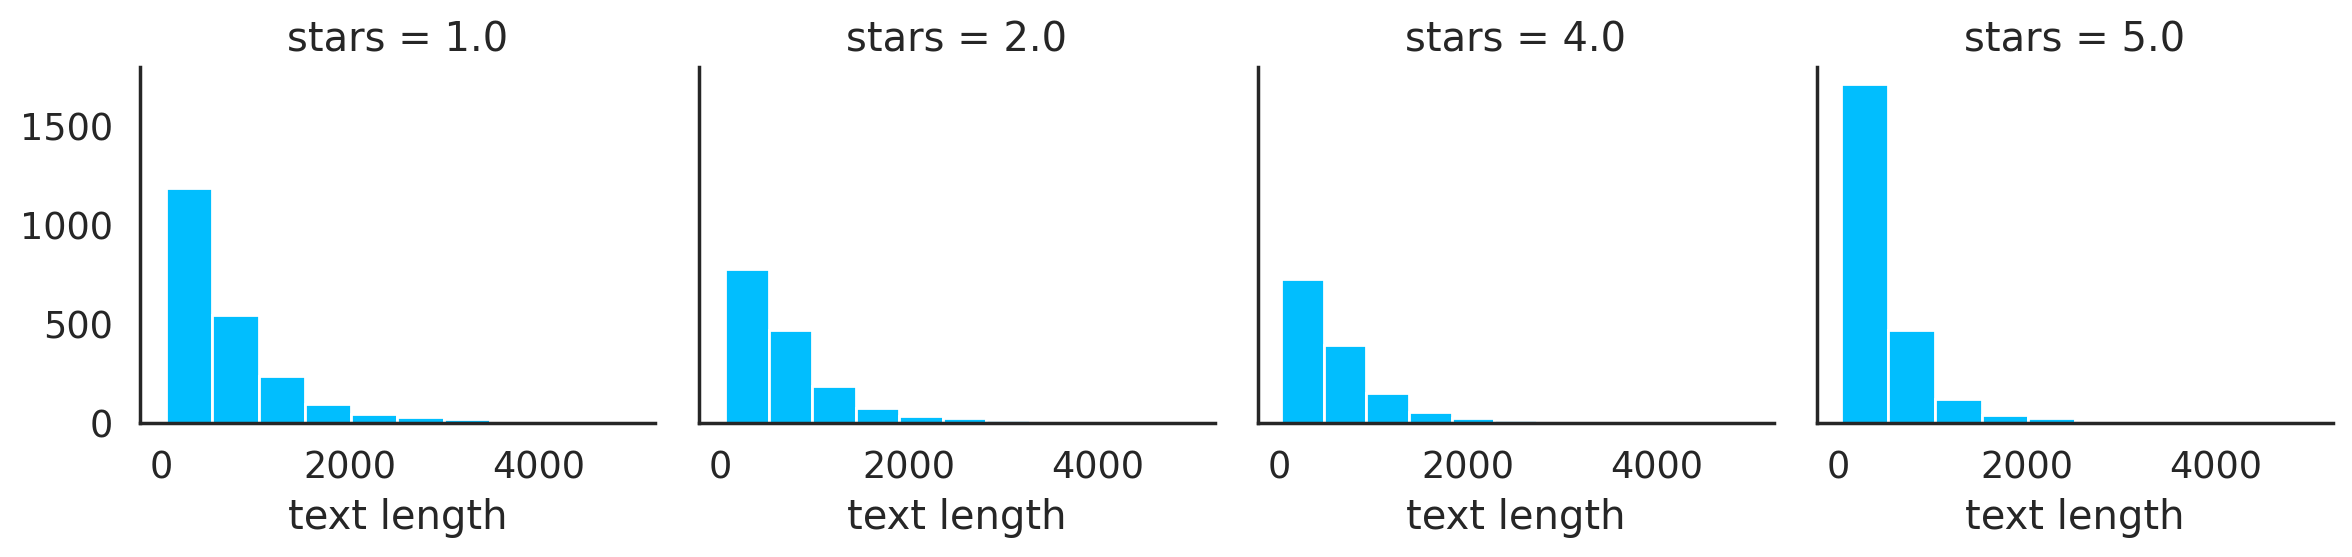

In [25]:
g = sns.FacetGrid(yelp, col = 'stars')
g.map(plt.hist, 'text length')

#**Data Preprocessing**

###We will only analyse the reviews written in English

In [26]:
from langdetect import detect
yelp['detect'] = yelp['text'].apply(detect)
yelp = yelp[yelp['detect'] == 'en'].reset_index(drop=True)


In [27]:
#Check if there is NaN values
yelp.isnull().values.any()

False

In [28]:
yelp.drop_duplicates(inplace=True)

In [29]:
yelp.drop('stars', axis=1, inplace=True)

In [30]:
yelp.head(10)

,text,feedback,text length,detect
0,Great clothing at a great price. They have sui...,1,245,en
1,Great local pizza with awesome owner and emplo...,1,305,en
2,What a wonderful weekend at the Peppermill. Ve...,1,461,en
3,"The food here is so good, they have a great pa...",1,199,en
4,Although I lack the gene that allows a person ...,1,2419,en
5,I would have rather put a hundred dollars down...,0,442,en
6,"Always have a great time here, and tonight was...",1,190,en
7,Some recent improvements in the practice: new...,1,545,en
8,I still love this place just as much as I ever...,1,955,en
9,I love El Sitio...in Isla Vista. I ordered a b...,0,292,en


##Stopwords with spaCy. As 'no' and 'not' are important words to describe an opinion about a restaurant (e.g. not cheap, not a good service, no napkins available, etc.), we should, at least, remove those two words from the stopwords.

In [31]:
sp = spacy.load('en_core_web_sm')
stopwords = sp.Defaults.stop_words

exclude_stopwords = ['no','not']
for word in exclude_stopwords:
    stopwords.remove(word)

###UDF to remove non-letters, convert to lower case, tokenize with NLTK and remove the spaCy stopwords from the restaurant reviews:

In [32]:
# The input is a single string (a raw restaurant review), and the output is a single string (a preprocessed restaurant review)

def text_preprocessing( raw_review ):
    # 1. Remove non-letters
    review_text_letters_only = re.sub("[^a-zA-Z]", " ", raw_review)
    # 2. Convert to lower case
    review_preprocessed = review_text_letters_only.lower()
    # 3. Word tokenization
    review_tokens = word_tokenize(review_preprocessed)
    # 4. Filter the stopwords
    filtered_sentence =[]
    for word in review_tokens:
        lexeme = sp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word)

    return " ".join(filtered_sentence)

###Apply the above UDF to the entire 'restaurant_reviews' column, creating a new column named 'cleaned_reviews'

In [33]:
yelp['cleaned_reviews'] = yelp['text'].apply(text_preprocessing)

In [34]:
yelp= yelp.reset_index(drop=True)

In [35]:
yelp.head()

,text,feedback,text length,detect,cleaned_reviews
0,Great clothing at a great price. They have sui...,1,245,en,great clothing great price suits tuxedos high ...
1,Great local pizza with awesome owner and emplo...,1,305,en,great local pizza awesome owner employees auth...
2,What a wonderful weekend at the Peppermill. Ve...,1,461,en,wonderful weekend peppermill helpful pleasant ...
3,"The food here is so good, they have a great pa...",1,199,en,food good great patio staff attentive professi...
4,Although I lack the gene that allows a person ...,1,2419,en,lack gene allows person excited sports love se...


#**Sentiment analysis of YELP reviews with BERT in PyTorch**

##Define the **pre-trained** model we are going to use:

*   “**bert-base-uncased**” is the version that has only lowercase letters (“uncased”) and is the smaller version of the two (“base” vs “large”).



In [36]:
pre_trained_model='bert-base-uncased'

##To feed our reviews to BERT they must be split into tokens, and then these tokens must be mapped to their index in the tokenizer vocabulary.


*   To feed our reviews to BERT they must be split into tokens, and then these tokens must be mapped to their index in the tokenizer vocabulary.
*   **Load the BERT Tokenizer:**



In [37]:
tokenizer=BertTokenizer.from_pretrained(pre_trained_model)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

####Before we are ready to encode our reviews we need to decide on a maximum sentence length. BERT expects fixed-length sequences, let's choose maximum sequence length:

In [38]:
token_lens = []

for txt in yelp.cleaned_reviews:
  tokens = tokenizer.encode(txt, max_length=512, truncation=True)
  token_lens.append(len(tokens))

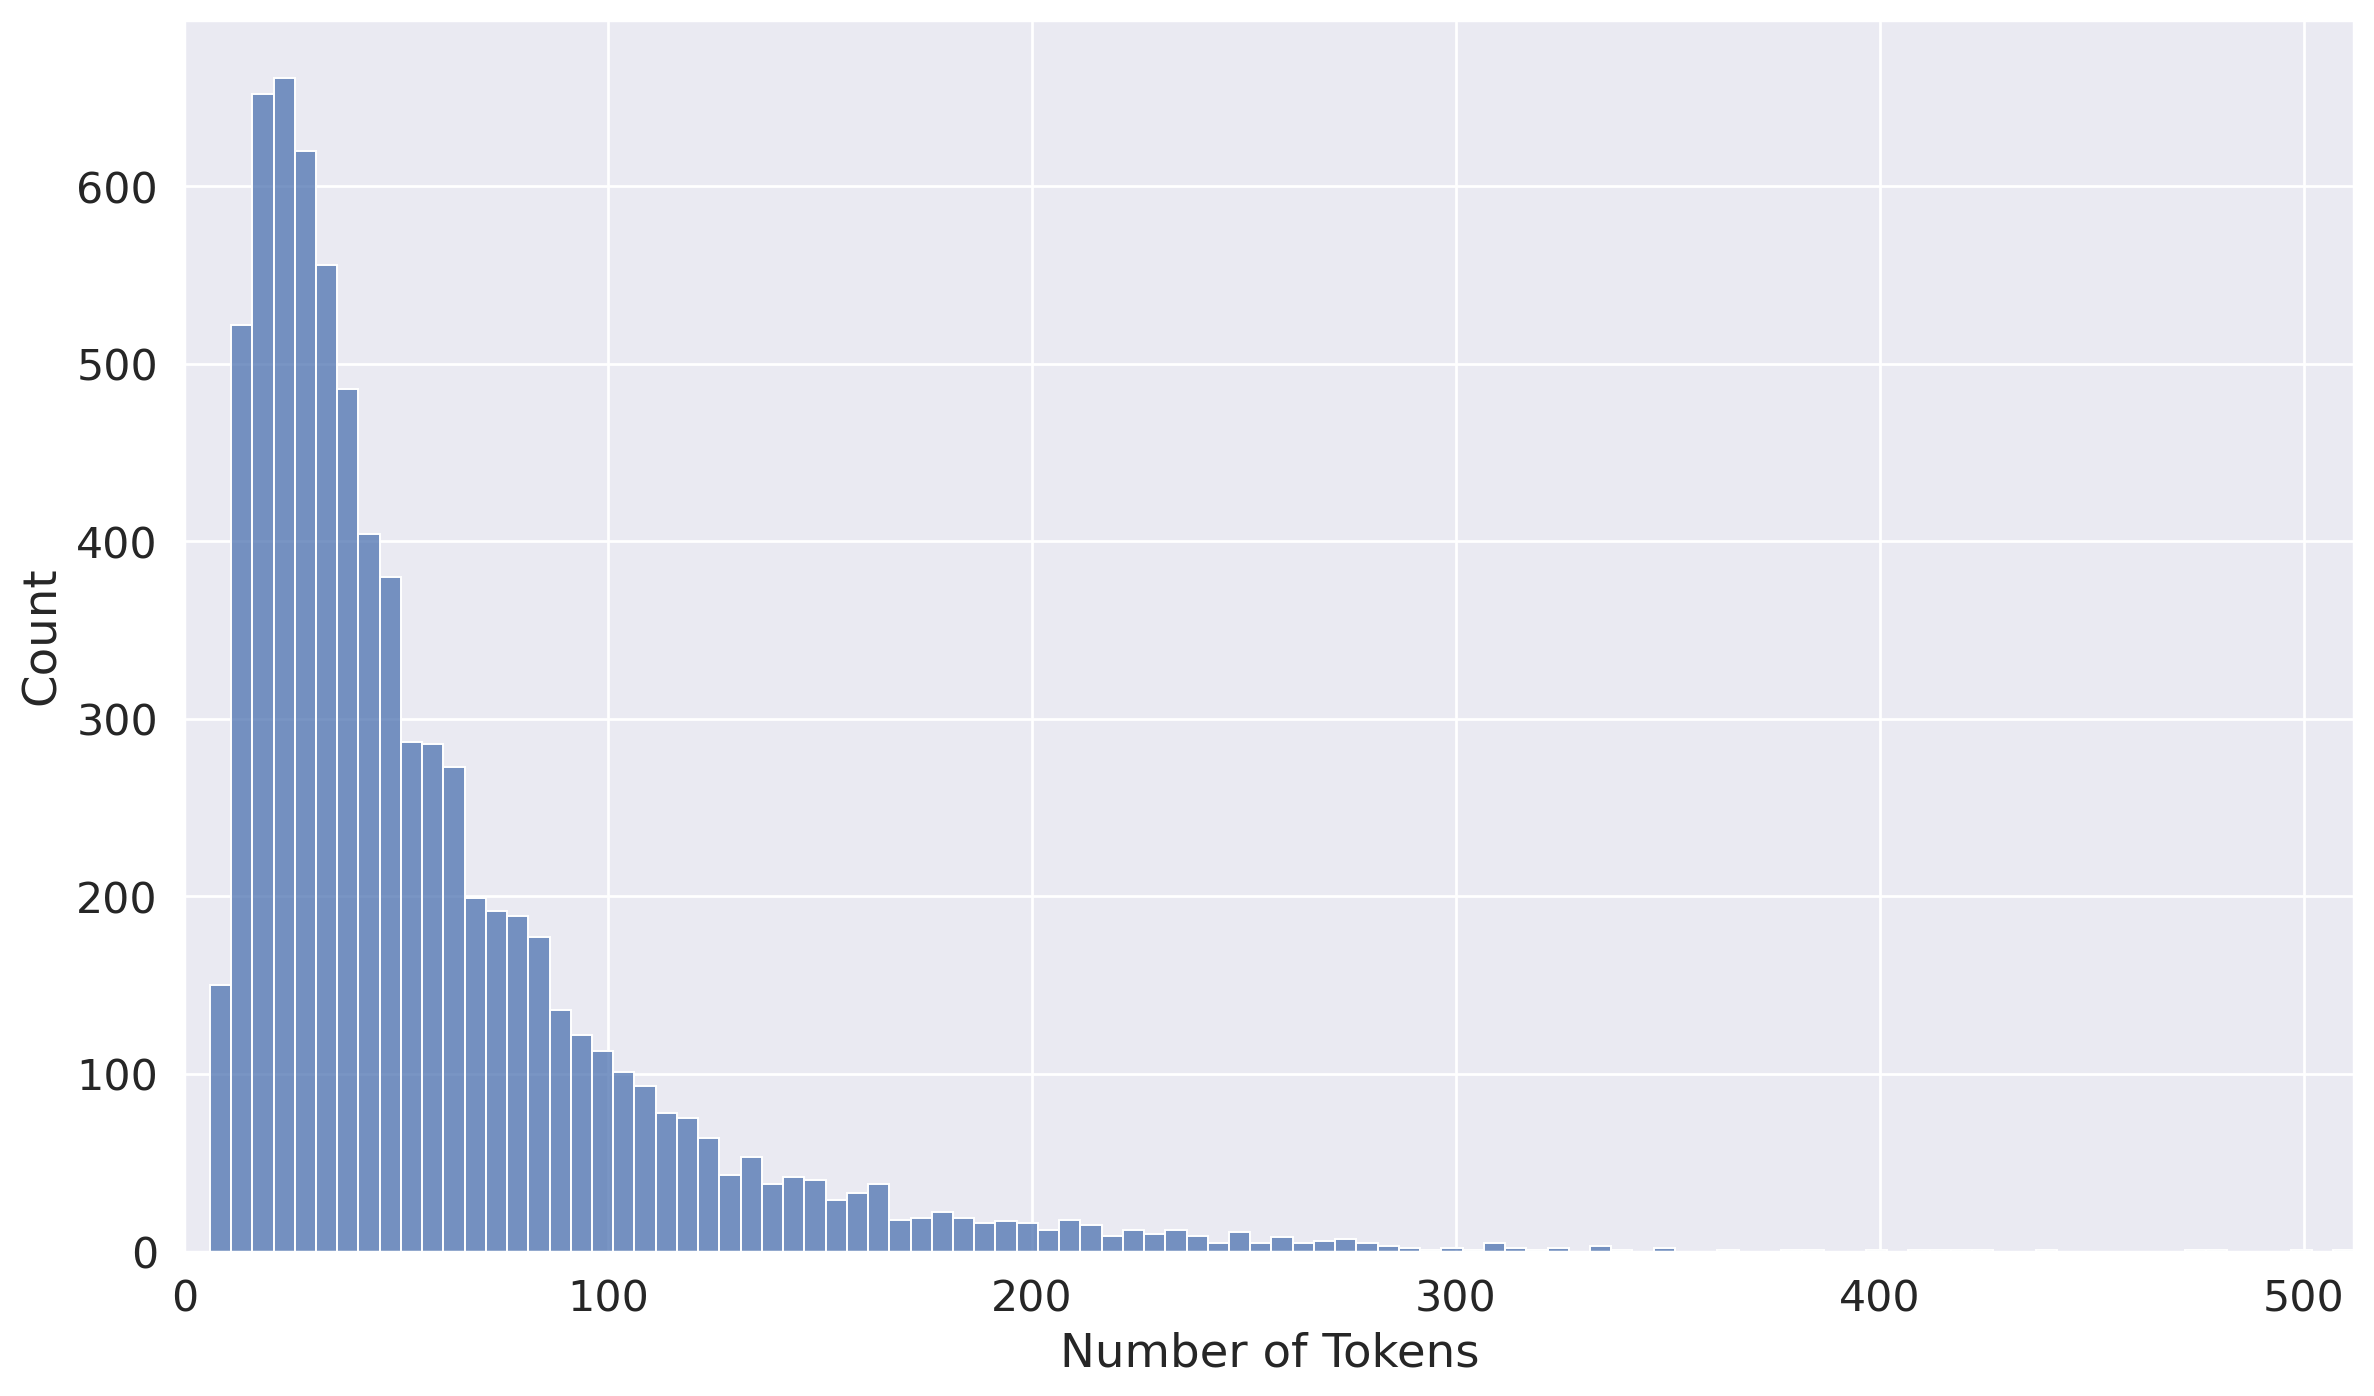

In [39]:
sns.set(font_scale=1.4)
plt.rcParams["figure.figsize"] = (14,8)
sns.histplot(token_lens)
plt.xlim([0, 512])
plt.xlabel('Number of Tokens')
plt.show()

###The great majority of the reviews seems to have less than 240 tokens, that's the maximum length that we'll choose.

In [40]:
MAX_SEQ_LENGTH = 240

In [41]:
df=yelp
df = df.rename(columns={'text': 'reviews'})
df = df.rename(columns={'feedback': 'sentiment'})
df.head()

,reviews,sentiment,text length,detect,cleaned_reviews
0,Great clothing at a great price. They have sui...,1,245,en,great clothing great price suits tuxedos high ...
1,Great local pizza with awesome owner and emplo...,1,305,en,great local pizza awesome owner employees auth...
2,What a wonderful weekend at the Peppermill. Ve...,1,461,en,wonderful weekend peppermill helpful pleasant ...
3,"The food here is so good, they have a great pa...",1,199,en,food good great patio staff attentive professi...
4,Although I lack the gene that allows a person ...,1,2419,en,lack gene allows person excited sports love se...


#**Split the Dataset**

###Split the dataset into train (70 %), validation (15%) and test (15%) sets and preserve the same proportions of observations in each class as observed in the original dataset

In [42]:
x_train, x_test, y_train, y_test = train_test_split(df['cleaned_reviews'],df.sentiment, test_size=0.3, random_state = 42, stratify=df.sentiment)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state = 42, stratify= y_test)

In [43]:
x_train.head(10)

5109    review downstairs bar drinks service place cro...
7414    ve driven past restaurant literally times toda...
5002    believe adorable spot tucked away mountains tr...
2095    beware bar attended blond celina sit table wai...
1137    nightmare dirty nasty smelly station paid cash...
3740    amber tried old fries weren t having cold burn...
1802    quality food terrible better biriyani legal se...
497     awful shower dispensed boiling hot water unusa...
4679    great experience wanting try mardi gras compli...
6050    taylor home solutions cleaned ducts large home...
Name: cleaned_reviews, dtype: object

In [44]:
y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_test = y_test.astype(int)

###Convert to list each of the sets

In [45]:
train_reviews = x_train.tolist()
val_reviews = x_val.tolist()
test_reviews = x_test.tolist()

#Create a sequence of token ids (input ids) for each review


*   **tokenizer.encode** converts a string in a sequence of intput ids (integers) using the tokenizer and the vocabulary, meaning, it splits a string into tokens and map the tokens to their ids.
*   We must add special tokens - [CLS] and [SEP] - for classification tasks.




In [46]:
# Train dataset
train_input_ids = [tokenizer.encode(train_reviews[i],add_special_tokens = True, max_length=MAX_SEQ_LENGTH, truncation=True) for i in range(0,len(train_reviews))]
# Val dataset
val_input_ids = [tokenizer.encode(val_reviews[i],add_special_tokens = True, max_length=MAX_SEQ_LENGTH, truncation=True) for i in range(0,len(val_reviews))]
# Test dataset
test_input_ids = [tokenizer.encode(test_reviews[i],add_special_tokens = True, max_length=MAX_SEQ_LENGTH, truncation=True) for i in range(0,len(test_reviews))]

##Padding and truncating: pad and truncate our sequences so that they all have the same length:

*   **Padding**: when necessary, paddding wiil add zeros to make all the sequences reach the length of MAX_SEQ_LENGTH
*   **Truncating**: when necessary, sequences longer than the MAX_SEQ_LENGTH are truncated to MAX_SEQ_LENGTH

*   Note: '**post**' specifies that we want to pad and truncate at the end of the sequence.







In [47]:
from keras.preprocessing.sequence import pad_sequences    # Pad utility function to pad sequences to maximum length.

# Padding value: is optional, the default is 0.

# Train dataset
train_input_ids = pad_sequences(train_input_ids, maxlen=MAX_SEQ_LENGTH, dtype="long",
                          value=0, truncating="post", padding="post")

# Validation dataset
val_input_ids = pad_sequences(val_input_ids, maxlen=MAX_SEQ_LENGTH, dtype="long",
                          value=0, truncating="post", padding="post")

# Test dataset
test_input_ids = pad_sequences(test_input_ids, maxlen=MAX_SEQ_LENGTH, dtype="long",
                          value=0, truncating="post", padding="post")

###**Attention Masks**

###The attention masks differentiate which tokens are real tokens versus which are [PAD] tokens.

In [48]:
# Create attention masks

# Train dataset
train_attention_masks = [[int(token_id > 0) for token_id in review]
                         for review in train_input_ids]
# dev dataset
val_attention_masks = [[int(token_id > 0) for token_id in review]
                         for review in val_input_ids]
# Test dataset
test_attention_masks = [[int(token_id > 0) for token_id in review]
                         for review in test_input_ids]

##Convert all lists of inputs ids, labels and attention masks into **torch tensors**

In [49]:
# input_ids
train_inputs = torch.tensor(train_input_ids)
val_inputs = torch.tensor(val_input_ids)
test_inputs = torch.tensor(test_input_ids)
# labels
train_labels = torch.tensor(y_train.values)
val_labels = torch.tensor(y_val.values)
test_labels = torch.tensor(y_test.values)
# attention masks
train_masks = torch.tensor(train_attention_masks)
val_masks = torch.tensor(val_attention_masks)
test_masks = torch.tensor(test_attention_masks)

##Create a DataLoader to load our datasets. Serves as an iterator, it saves memory during training when compared with a for loop

In [50]:
batch_size = 16

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

# Create the DataLoader for our test set.
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [51]:
# Number of classes / labels
n_classes = y_train.nunique()
n_classes

2

#**Model Building**

##**Build a sentiment Classifier**

###**BertForSequenceClassification**

In [52]:
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # The 12-layer BERT model with an uncased vocab
    num_labels = 2, # For binary classification
    output_attentions = False, # Not to return attentions weights
    output_hidden_states = False, # Not to return all hidden-states
)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [53]:
model = model.to(device)

##To fine-tune our Bert Classifier we need to create an optimizer. The authors have some recommendations for fine-tuning:


*   Batch size: 16, 32
*   Learning rate (Adam): 5e-5, 3e-5, 2e-5
*   Number of epochs: 2, 3 or 4

We chose 16, 3e-5 and 2, respectively.
  





In [54]:
epochs=2

optimizer=AdamW(model.parameters(),lr=3e-5)
total_steps=len(train_dataloader)*epochs

# Create the learning rate scheduler
scheduler=get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)
 # Define loss function and move it to GPU
loss_fn=nn.CrossEntropyLoss().to(device)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


#**Training** our Model and **Validation**

In [55]:
def format_time(elapsed):
    # Round to the nearest second
    elapsed_round = int(round(elapsed))
    # Format time in hh:mm:ss
    return str(datetime.timedelta(seconds = elapsed_round))

In [56]:
def accuracy(preds, labels):
    preds = np.argmax(preds, axis=1).flatten()
    labels = labels.flatten()
    return np.sum(preds == labels) / len(labels)

**Training and validation**:
We can store the training and validation loss and accuracy values and then plot or make a table to measure the performance on both the train and validation sets after the completion of each epoch so we can see more clearly the progress of the training loop.

In [57]:
# Store for each epoch
loss_train_values = []
acc_train_values = []
loss_val_values = []
acc_val_values = []
for epoch in range(0,epochs):

        #             --- Train---

        # Perform forward pass over the training dataset
        print("\n Epoch {:}/{:} :".format(epoch+1,epochs))
        print('Training....')

        # Measure how long the training epoch takes
        t0 = time.time()
        # Reset total loss and accuracy for this epoch
        total_loss = 0
        total_acc = 0

        # Put the model in training mode
        model.train()

        # For each batch of training data
        for step, batch in enumerate(train_dataloader):
            # Update progress for each 100 steps
            if (step % 100==0) & (not step==0):
                # Calculate elapsed time in minutes
                elapsed = format_time((time.time()-t0))
                # Report progress
                print(' Batch {:>5,} of {:>5,}. Elapsed:{:}.'.format(step,len(train_dataloader),elapsed))

            # Unpack training batch from trainloader and move to GPU
            b_input_ids = batch[0].to(device)  # 0 - input ids tensor
            b_attention_mask = batch[1].to(device) # 1 - input masks tensor
            b_labels = batch[2].to(device) # 2 - labels tensor

            # Clear any previously calculated gradients in Pytorch before performing a backward pass
            model.zero_grad()

            # Output the results
            outputs = model(input_ids = b_input_ids, attention_mask = b_attention_mask, labels=b_labels) # Return tuple
            # Loss value from output
            loss = outputs.loss   # Loss

            # Update total loss
            total_loss += loss.item()

            preds = outputs.logits  # Output probabilities
            # Move logits and labels to CPU
            preds = preds.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()

            # Calculate the accuracy for this batch
            tmp_train_accuracy = accuracy(preds, label_ids)

            # Accumulate the total accuracy
            total_acc += tmp_train_accuracy

            # Perform a backward pass to calculate gradients
            loss.backward()

            # To avoid exploding vanishing gradients problem, clip the norm of the gradients to 1.0
            torch.nn.utils.clip_grad_norm_(model.parameters(),1.0)

            # Update the parameters (weights)
            optimizer.step()

            # Update the learning rate
            scheduler.step()

        # Calculate the average loss over training data
        avg_total_loss = total_loss/len(train_dataloader)

        # Store the loss values
        loss_train_values.append(avg_total_loss)

        # Calculate the average accuracy over the training data
        avg_train_acc = total_acc / len(train_dataloader)

        # Store the accuracy values
        acc_train_values.append(avg_train_acc)

        print("")
        print("\nAverage training accuracy: {0:.2f}".format(avg_train_acc))

        print('Average training loss : {0:.2f}'.format(avg_total_loss))
        print('Training epoch took: {:}'.format(format_time(time.time()- t0)))

        #             --- VALIDATION ---


        # After each epoch perform validation to check model performance
        print('\n Running validation...')

        t0 = time.time()
        # Put model in evaluation mode
        model.eval()

        # Tracking variables
        total_eval_accuracy = 0
        total_eval_loss = 0

        # Unpack validation batch from trainloader and move to GPU
        for batch in val_dataloader:
            b_input_ids = batch[0].to(device)
            b_input_mask = batch[1].to(device)
            b_labels = batch[2].to(device)

            # Tell model not to compute gradients to save memory and accelerate validation
            with torch.no_grad():
                # Forward pass, calculate logit prediction
                 outputs = model(b_input_ids,
                                   token_type_ids=None,
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            loss = outputs.loss
            logits = outputs.logits
            # Update total evaluation loss
            total_eval_loss += loss.item()

            # Move logits and labels to CPU
            logits = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()

            # Calculate the accuracy for this batch and accumulate it over all batches
            total_eval_accuracy += accuracy(logits, label_ids)

        # Compute the average accuracy over all of the batches
        avg_val_accuracy = total_eval_accuracy / len(val_dataloader)

        # Store the accuracy values
        acc_val_values.append(avg_val_accuracy)

        # Compute the average loss over all of the batches
        avg_val_loss = total_eval_loss / len(val_dataloader)

         # Store the loss values
        loss_val_values.append(avg_val_loss)

    # Measure how long the validation run took.
        validation_time = format_time(time.time() - t0)
        print("  Accuracy: {0:.2f}".format(avg_val_accuracy))
        print("  Validation Loss: {0:.2f}".format(avg_val_loss))
        print("  Validation took: {:}".format(validation_time))




 Epoch 1/2 :
Training....
 Batch   100 of   326. Elapsed:0:00:59.
 Batch   200 of   326. Elapsed:0:01:59.
 Batch   300 of   326. Elapsed:0:02:59.


Average training accuracy: 0.89
Average training loss : 0.29
Training epoch took: 0:03:15

 Running validation...
  Accuracy: 0.91
  Validation Loss: 0.22
  Validation took: 0:00:15

 Epoch 2/2 :
Training....
 Batch   100 of   326. Elapsed:0:01:00.
 Batch   200 of   326. Elapsed:0:02:01.
 Batch   300 of   326. Elapsed:0:03:02.


Average training accuracy: 0.96
Average training loss : 0.13
Training epoch took: 0:03:17

 Running validation...
  Accuracy: 0.92
  Validation Loss: 0.28
  Validation took: 0:00:15


###**Plot validation accuracy after the completion of each epoch:**

In [58]:
df_acc = pd.DataFrame(acc_val_values,columns=['Accuracy'])

In [59]:
df_acc.index+=1

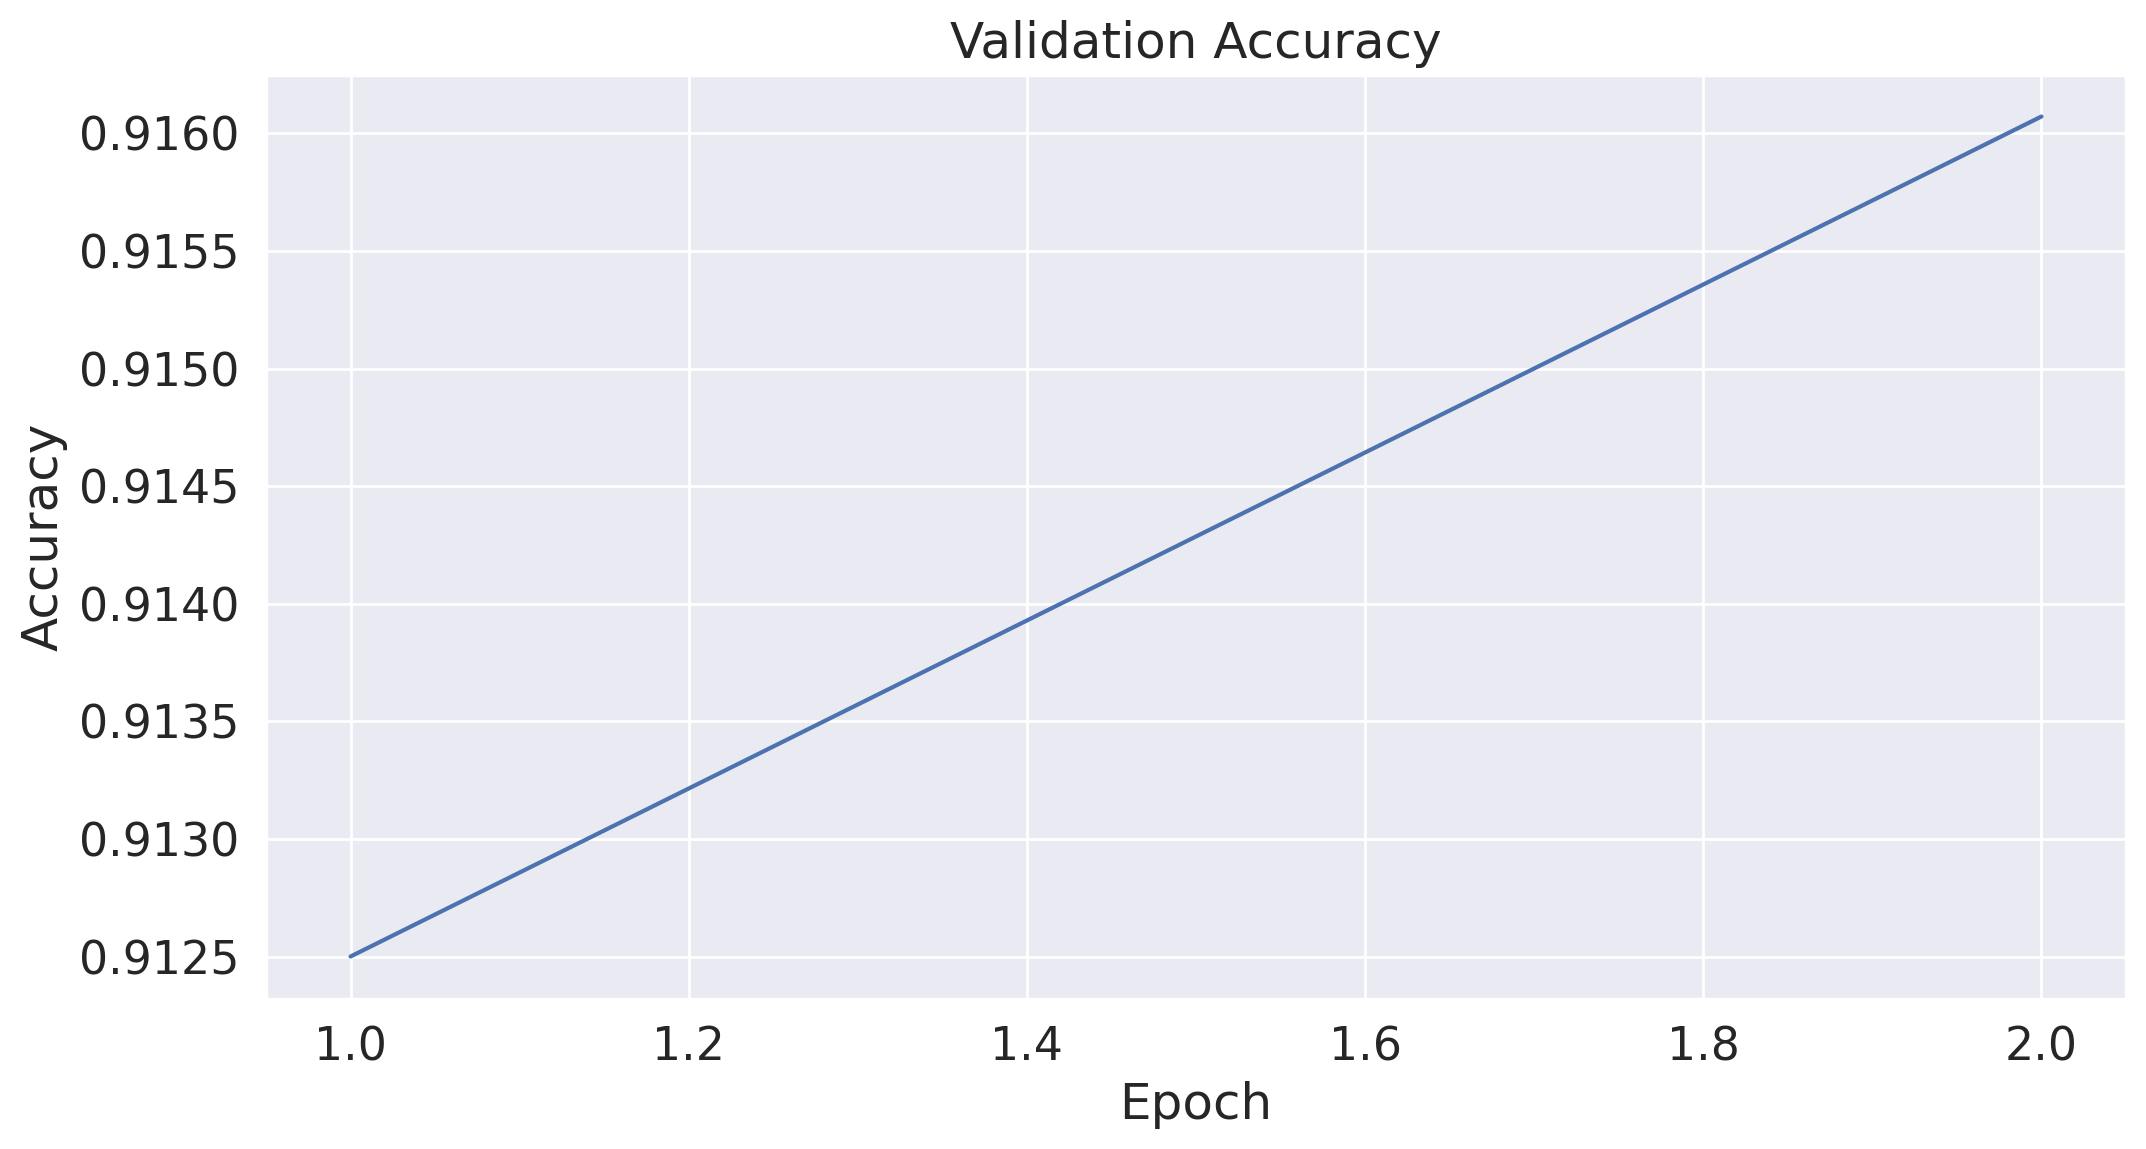

In [60]:
# Use plot styling from seaborn
sns.set(style='darkgrid')

# Increase the plot size and font size
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve
sns.lineplot(data=df_acc,x=df_acc.index,y=df_acc.Accuracy)

# Label the plot
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.show()

###**Plot validation loss after the completion of each epoch:**

In [61]:
df_loss = pd.DataFrame(loss_val_values,columns=['Loss'])

In [62]:
df_loss.index+=1

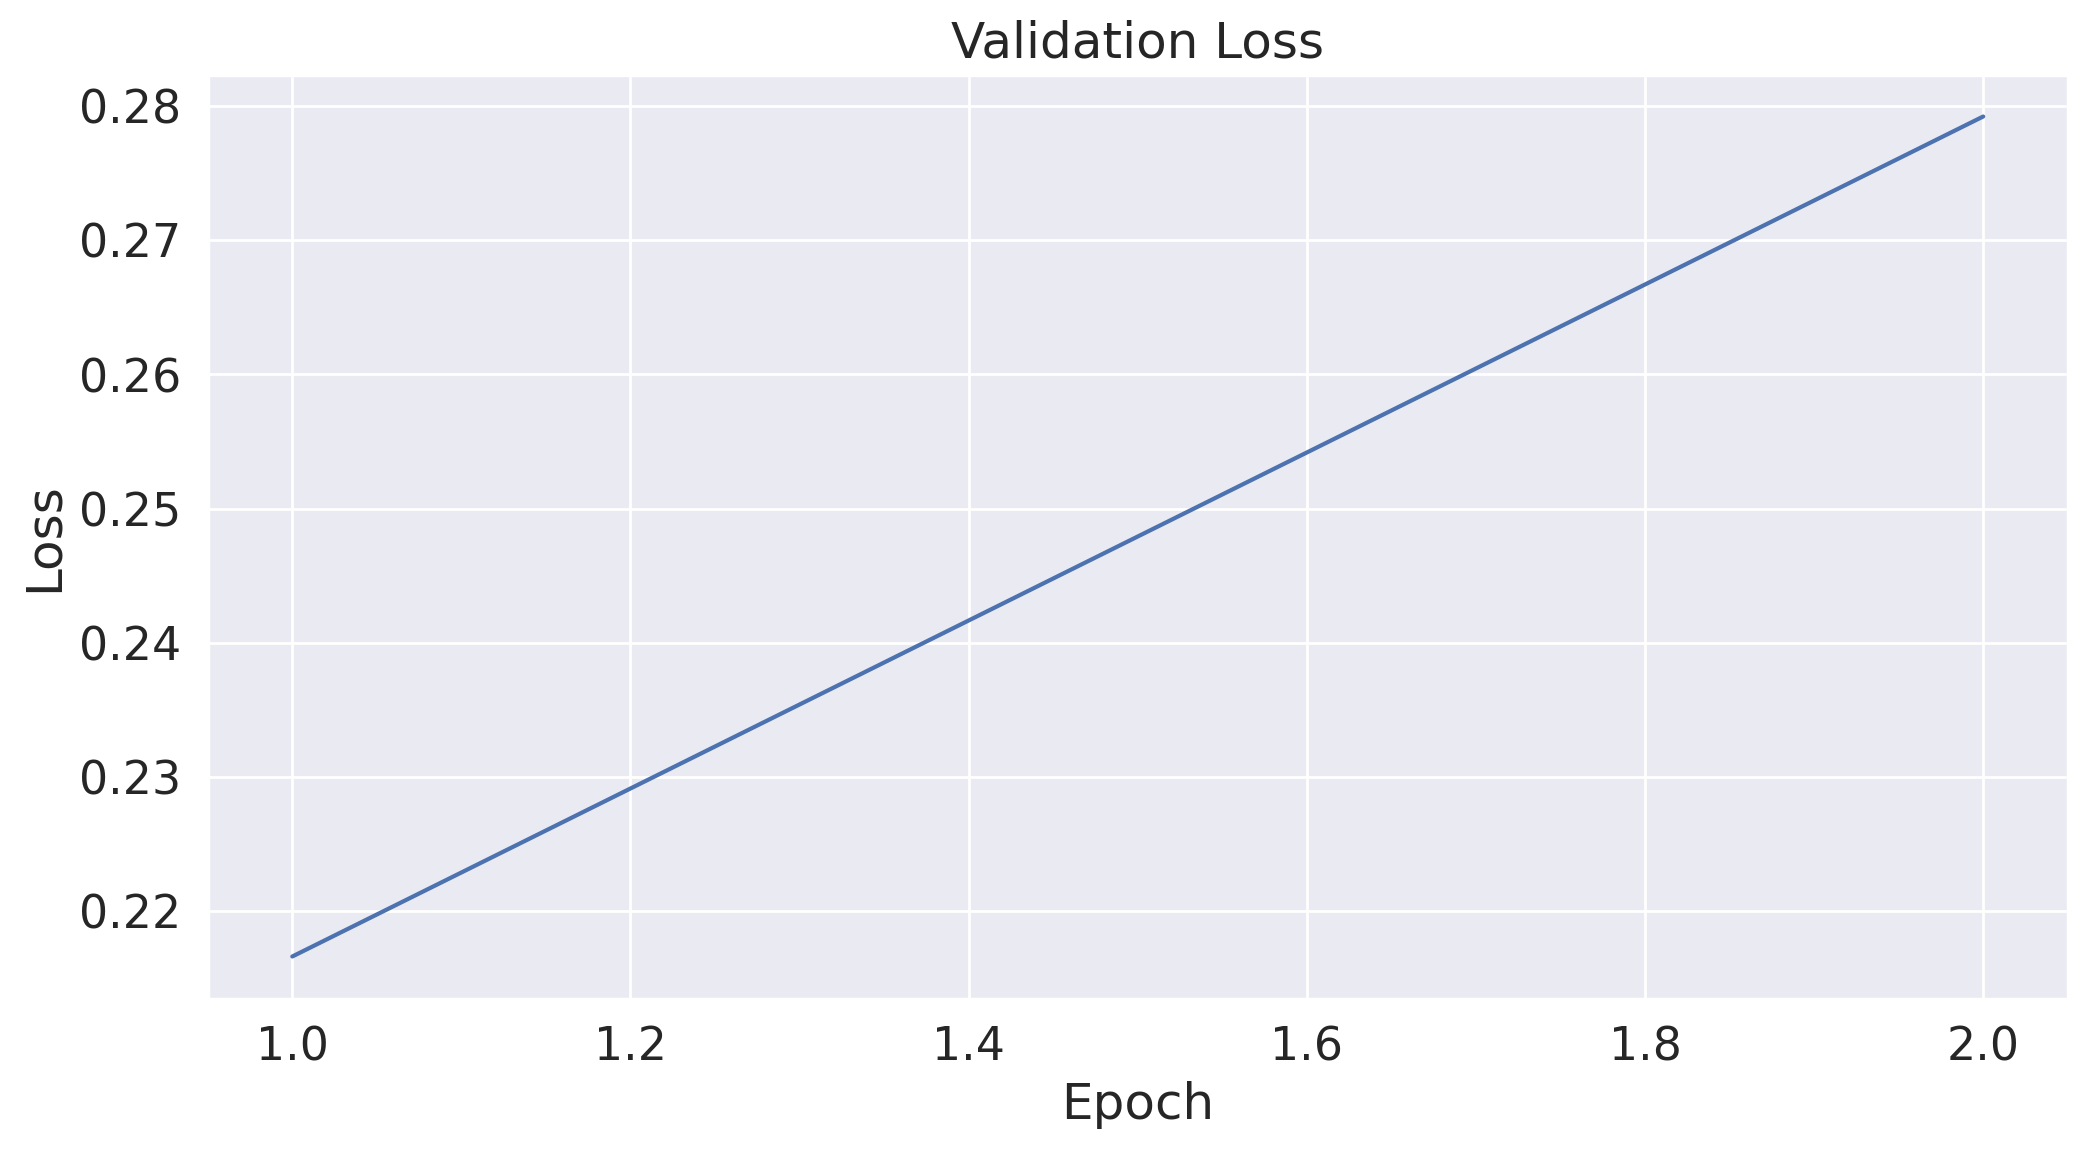

In [63]:
# Use plot styling from seaborn
sns.set(style='darkgrid')

# Increase the plot size and font size
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve
sns.lineplot(data=df_loss,x=df_loss.index,y=df_loss.Loss)

# Label the plot
plt.title("Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

#**Evaluation of Model**

###**Predicting on test set**

In [66]:
# Put model in evaluation mode
model.eval()

# Tracking variables
predictions , true_labels = [], []

# Predict test data
for batch in test_dataloader:
    # Move batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack inputs from test dataloader
    b_input_ids, b_attention_mask, b_labels = batch
    # Tell model not to compute gradients to save memory and accelerate validation
    with torch.no_grad():
        # Forward pass, calculate logit prediction
        outputs = model(input_ids=b_input_ids, attention_mask=b_attention_mask)
    # logits are class probabilities and get them from outputs
    logits = outputs[0]

    # Store predictions and true labels
    predictions.extend(logits.tolist())
    true_labels.extend(b_labels.tolist())

print('Done')

Done


In [67]:
preds = torch.tensor(predictions)

In [68]:
import torch.nn.functional as F

preds = F.softmax(preds,dim=1)

In [69]:
preds = np.array(preds)
true_labels = np.array(true_labels)

In [70]:
# To convert the predictions into predicted classes
predicted_classes = np.argmax(preds, axis=1)

#Print the first 20 predictions of the model and the true labels
for i in range(20):
    print(f"Example {i + 1}: Predicted Class: {predicted_classes[i]}, True Label: {true_labels[i]}")


Example 1: Predicted Class: 1, True Label: 1
Example 2: Predicted Class: 0, True Label: 0
Example 3: Predicted Class: 1, True Label: 1
Example 4: Predicted Class: 0, True Label: 0
Example 5: Predicted Class: 0, True Label: 1
Example 6: Predicted Class: 1, True Label: 1
Example 7: Predicted Class: 0, True Label: 1
Example 8: Predicted Class: 1, True Label: 1
Example 9: Predicted Class: 0, True Label: 0
Example 10: Predicted Class: 0, True Label: 1
Example 11: Predicted Class: 0, True Label: 0
Example 12: Predicted Class: 0, True Label: 0
Example 13: Predicted Class: 1, True Label: 1
Example 14: Predicted Class: 0, True Label: 0
Example 15: Predicted Class: 1, True Label: 0
Example 16: Predicted Class: 1, True Label: 1
Example 17: Predicted Class: 1, True Label: 1
Example 18: Predicted Class: 0, True Label: 0
Example 19: Predicted Class: 0, True Label: 0
Example 20: Predicted Class: 0, True Label: 0


##NLP classification


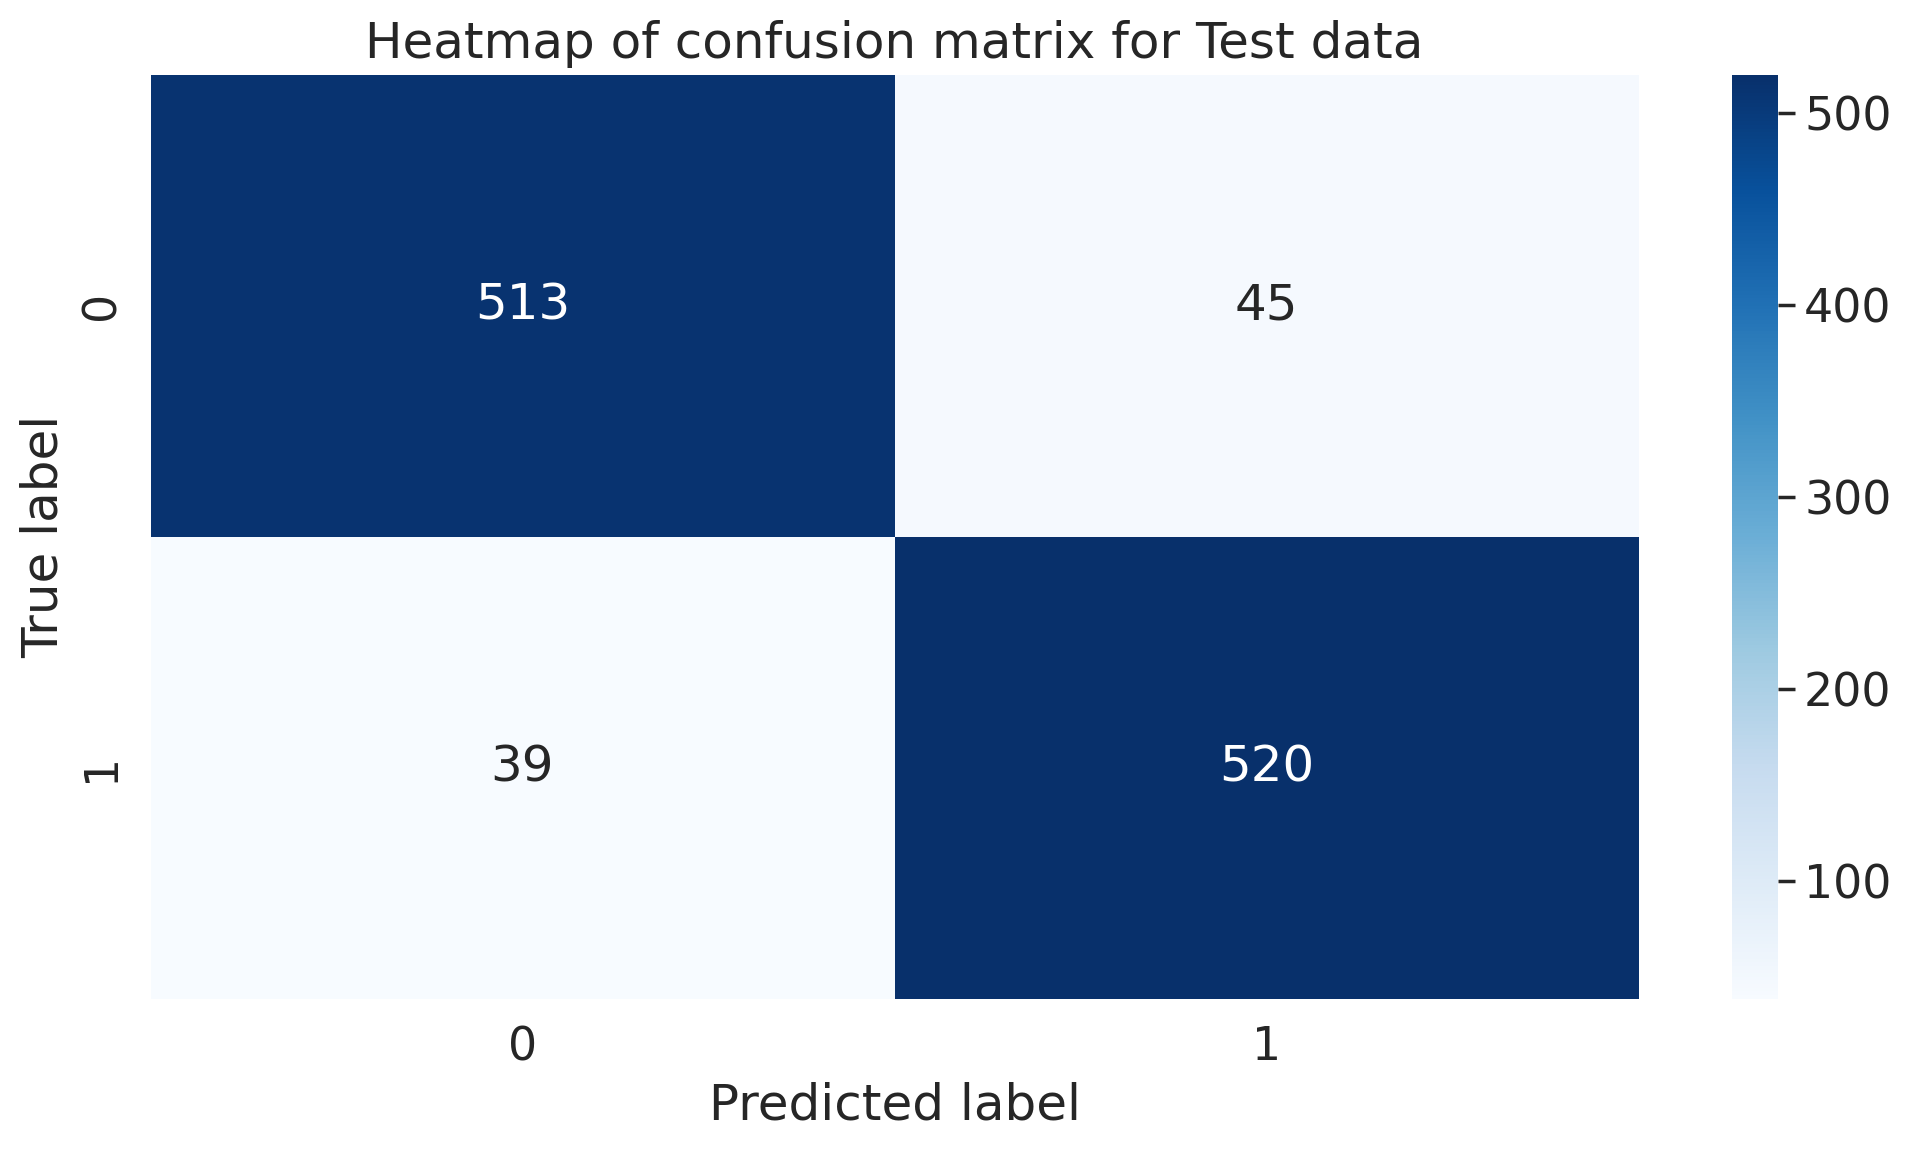

In [72]:
def evaluate(y_test, predictions):
    cf_matrix = confusion_matrix(true_labels, preds.argmax(1))
    sns.heatmap(cf_matrix, annot = True, fmt = 'd',cmap="Blues")
    plt.title('Heatmap of confusion matrix for Test data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
evaluate(true_labels, preds.argmax(1))

In [73]:
class_report= classification_report(true_labels, preds.argmax(1), digits=3)
print(class_report)

              precision    recall  f1-score   support

           0      0.929     0.919     0.924       558
           1      0.920     0.930     0.925       559

    accuracy                          0.925      1117
   macro avg      0.925     0.925     0.925      1117
weighted avg      0.925     0.925     0.925      1117



###**Conclusion**:


*   Our model seems to generalize well because the accuracy on the test set is very similar to the accuracy on the validation set (even higher: **92.6 >92.3%**).

